# Tidy Data

## Exercises

### 1. Attendance Data

Load the attendance.csv file and calculate an attendance percentage for each student. One half day is worth 50% of a full day, and 10 tardies is equal to one absence.

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns

In [34]:
# read in the .csv file named attendance.csv
df = pd.read_csv('untidy-data/attendance.csv')
df.head()

,Unnamed: 0,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08
0,Sally,P,T,T,H,P,A,T,T
1,Jane,A,P,T,T,T,T,A,T
2,Billy,A,T,A,A,H,T,P,T
3,John,P,T,H,P,P,T,P,P


In [35]:
#rename columns
df = df.rename(columns = {'Unnamed: 0': 'name'})
df

,name,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08
0,Sally,P,T,T,H,P,A,T,T
1,Jane,A,P,T,T,T,T,A,T
2,Billy,A,T,A,A,H,T,P,T
3,John,P,T,H,P,P,T,P,P


In [36]:
# Melt the data. Creates two new columns 

df_tidy = pd.melt(df, id_vars='name', 
                  var_name = 'date', 
                  value_name = 'att_code')

df_tidy

,name,date,att_code
0,Sally,2018-01-01,P
1,Jane,2018-01-01,A
2,Billy,2018-01-01,A
3,John,2018-01-01,P
4,Sally,2018-01-02,T
5,Jane,2018-01-02,P
6,Billy,2018-01-02,T
7,John,2018-01-02,T
8,Sally,2018-01-03,T
9,Jane,2018-01-03,T


In [37]:
df_tidy['att_code_value'] = df_tidy["att_code"].map(lambda x: 1 if "P" in x else 0.5 if "H" in x else 0 if "A" in x else 0.9 if "T" in x else "")

print(df_tidy)

#Another way: att_code.replace(['P','A','T','H'],[1, 0, 0.9, 0.5])

     name        date att_code  att_code_value
0   Sally  2018-01-01        P             1.0
1    Jane  2018-01-01        A             0.0
2   Billy  2018-01-01        A             0.0
3    John  2018-01-01        P             1.0
4   Sally  2018-01-02        T             0.9
5    Jane  2018-01-02        P             1.0
6   Billy  2018-01-02        T             0.9
7    John  2018-01-02        T             0.9
8   Sally  2018-01-03        T             0.9
9    Jane  2018-01-03        T             0.9
10  Billy  2018-01-03        A             0.0
11   John  2018-01-03        H             0.5
12  Sally  2018-01-04        H             0.5
13   Jane  2018-01-04        T             0.9
14  Billy  2018-01-04        A             0.0
15   John  2018-01-04        P             1.0
16  Sally  2018-01-05        P             1.0
17   Jane  2018-01-05        T             0.9
18  Billy  2018-01-05        H             0.5
19   John  2018-01-05        P             1.0
20  Sally  20

In [38]:
df_total_value_attended = df_tidy.groupby('name').att_code_value.sum()

print(df_total_value_attended)

df_days_attended = df_tidy.groupby('name').date.count()

print(df_days_attended)

df_att_pct = (df_total_value_attended  / df_days_attended)

df_att_pct

name
Billy    4.2
Jane     5.5
John     7.3
Sally    6.1
Name: att_code_value, dtype: float64
name
Billy    8
Jane     8
John     8
Sally    8
Name: date, dtype: int64


name
Billy    0.5250
Jane     0.6875
John     0.9125
Sally    0.7625
dtype: float64

In [78]:
df_tidy.groupby('name').att_code_value.mean()

name
Billy    0.5250
Jane     0.6875
John     0.9125
Sally    0.7625
Name: att_code_value, dtype: float64

### 2. Coffee Levels

    a. Read the coffee_levels.csv file.
    b. Transform the data so that each carafe is in it's own column.
    c. Is this the best shape for the data?

In [39]:
# read in the .csv file named coffee_levels.csv 
df = pd.read_csv('untidy-data/coffee_levels.csv')
df.head()

,hour,coffee_carafe,coffee_amount
0,8,x,0.816164
1,9,x,0.451018
2,10,x,0.843279
3,11,x,0.335533
4,12,x,0.898291


In [54]:
# pivot the coffee_carafe column. Reset index to go from multi-index to flat dataframe.

coffee_tidy = df.pivot_table(index = ['hour'],
                                       columns = ['coffee_carafe'], values='coffee_amount').reset_index()
coffee_tidy

coffee_carafe,hour,x,y,z
0,8,0.816164,0.189297,0.999264
1,9,0.451018,0.521502,0.915990
2,10,0.843279,0.023163,0.144928
3,11,0.335533,0.235529,0.311495
4,12,0.898291,0.017009,0.771947
5,13,0.310711,0.997464,0.398520
6,14,0.507288,0.058361,0.864464
7,15,0.215043,0.144644,0.436364
8,16,0.183891,0.544676,0.280621
9,17,0.391560,0.594126,0.436677


<AxesSubplot:>

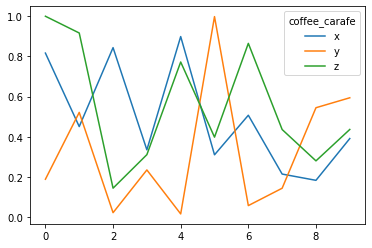

In [79]:
coffee_tidy[['x','y','z']].plot()

In [57]:
# c. Is this the best shape for the data? -Not sure

### 3. Cake Recipes

     a. Read the cake_recipes.csv data. This data set contains cake tastiness scores for 
        combinations of different recipes, oven rack positions, and oven temperatures.
     b. Tidy the data as necessary.
     c. Which recipe, on average, is the best? recipe b
     d. Which oven temperature, on average, produces the best results? 275
     e. Which combination of recipe, rack position, and temperature gives the best result? 
        Recipe b, bottom rack, 300 degrees

In [48]:
# read in the .csv file named coffee_levels.csv 
df_cake = pd.read_csv('untidy-data/cake_recipes.csv')
df_cake.head()

,recipe:position,225,250,275,300
0,a:bottom,61.738655,53.912627,74.414730,98.786784
1,a:top,51.709751,52.009735,68.576858,50.228470
2,b:bottom,57.095320,61.904369,61.196980,99.248541
3,b:top,82.455004,95.224151,98.594881,58.169349
4,c:bottom,96.470207,52.001358,92.893227,65.473084


In [50]:
#rename column
df_cake = df_cake.rename(columns = {'recipe:position':'r_p'})
df_cake

,r_p,225,250,275,300
0,a:bottom,61.738655,53.912627,74.414730,98.786784
1,a:top,51.709751,52.009735,68.576858,50.228470
2,b:bottom,57.095320,61.904369,61.196980,99.248541
3,b:top,82.455004,95.224151,98.594881,58.169349
4,c:bottom,96.470207,52.001358,92.893227,65.473084
5,c:top,71.306308,82.795477,92.098049,53.960273
6,d:bottom,52.799753,58.670419,51.747686,56.183110
7,d:top,96.873178,76.101363,59.571620,50.971626


In [53]:
df_cake[['recipe', 'rack_position']] = df_cake.r_p.str.split(':', expand = True)
df_cake

,r_p,225,250,275,300,recipe,rack_position
0,a:bottom,61.738655,53.912627,74.414730,98.786784,a,bottom
1,a:top,51.709751,52.009735,68.576858,50.228470,a,top
2,b:bottom,57.095320,61.904369,61.196980,99.248541,b,bottom
3,b:top,82.455004,95.224151,98.594881,58.169349,b,top
4,c:bottom,96.470207,52.001358,92.893227,65.473084,c,bottom
5,c:top,71.306308,82.795477,92.098049,53.960273,c,top
6,d:bottom,52.799753,58.670419,51.747686,56.183110,d,bottom
7,d:top,96.873178,76.101363,59.571620,50.971626,d,top


In [62]:
df_cake = df_cake.drop('r_p', 1)


In [63]:
df_cake

,225,250,275,300,recipe,rack_position
0,61.738655,53.912627,74.414730,98.786784,a,bottom
1,51.709751,52.009735,68.576858,50.228470,a,top
2,57.095320,61.904369,61.196980,99.248541,b,bottom
3,82.455004,95.224151,98.594881,58.169349,b,top
4,96.470207,52.001358,92.893227,65.473084,c,bottom
5,71.306308,82.795477,92.098049,53.960273,c,top
6,52.799753,58.670419,51.747686,56.183110,d,bottom
7,96.873178,76.101363,59.571620,50.971626,d,top


In [64]:
df_cake = df_cake.melt(id_vars=['recipe', 'rack_position'],
                        var_name = 'temp', 
                        value_name = 'score')
df_cake

,recipe,rack_position,temp,score
0,a,bottom,225,61.738655
1,a,top,225,51.709751
2,b,bottom,225,57.095320
3,b,top,225,82.455004
4,c,bottom,225,96.470207
5,c,top,225,71.306308
6,d,bottom,225,52.799753
7,d,top,225,96.873178
8,a,bottom,250,53.912627
9,a,top,250,52.009735


In [66]:
#. Which recipe, on average, is the best? Recipe b
df_cake.groupby('recipe').score.mean()

recipe
a    63.922201
b    76.736074
c    75.874748
d    62.864844
Name: score, dtype: float64

In [84]:
# Which oven temperature, on average, produces the best results? 275
df_cake.groupby('temp').score.mean()

temp
225    71.306022
250    66.577437
275    74.886754
300    66.627655
Name: score, dtype: float64

In [86]:
df_cake.groupby('temp').score.mean().max()

74.8867538664983

In [82]:
# Which combination of recipe, rack position, and temperature gives the best result? - Recipe b, bottom rack, 300 degrees
df_cake.groupby(['recipe', 'rack_position', 'temp']).score.mean()



recipe  rack_position  temp
a       bottom         225     61.738655
                       250     53.912627
                       275     74.414730
                       300     98.786784
        top            225     51.709751
                       250     52.009735
                       275     68.576858
                       300     50.228470
b       bottom         225     57.095320
                       250     61.904369
                       275     61.196980
                       300     99.248541
        top            225     82.455004
                       250     95.224151
                       275     98.594881
                       300     58.169349
c       bottom         225     96.470207
                       250     52.001358
                       275     92.893227
                       300     65.473084
        top            225     71.306308
                       250     82.795477
                       275     92.098049
                       300   

In [83]:
df_cake.groupby(['recipe', 'rack_position', 'temp']).score.mean().idxmax()

('b', 'bottom', '300')

In [77]:
df_cake[df_cake.score == df_cake.score.max()]

,recipe,rack_position,temp,score
26,b,bottom,300,99.248541
